In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\user\Downloads\train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv(r"C:\Users\user\Downloads\test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_org=train.copy()
test_org=test.copy()

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<AxesSubplot:>

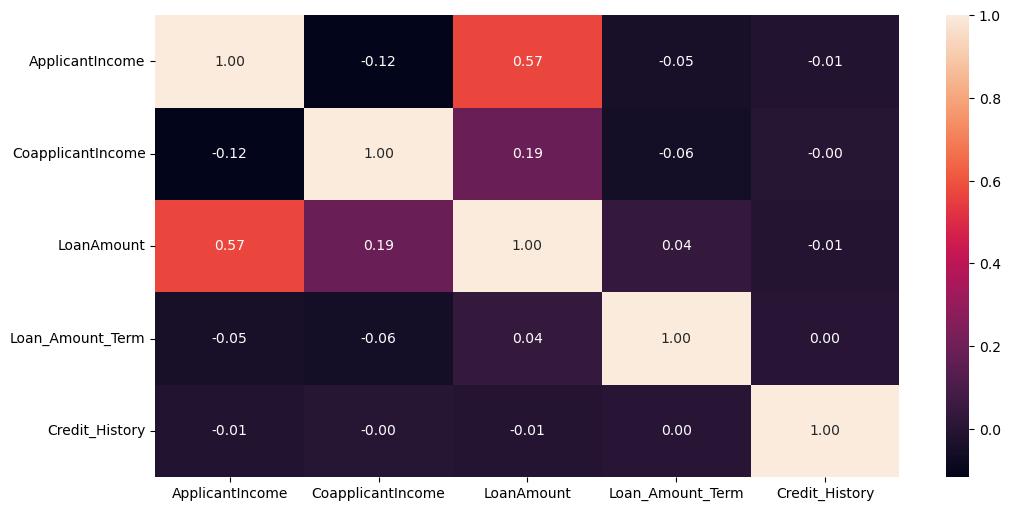

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), annot=True,fmt='.2f')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

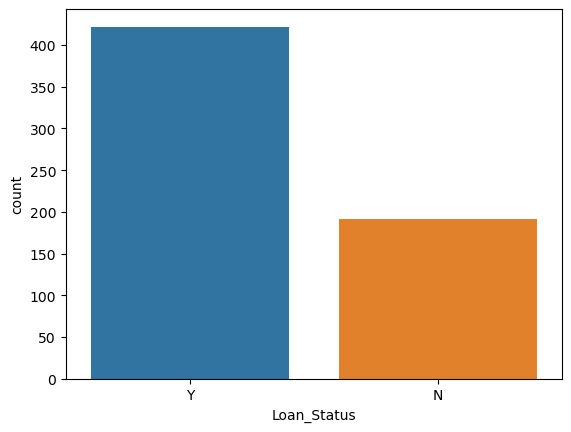

In [14]:
sns.countplot(train['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

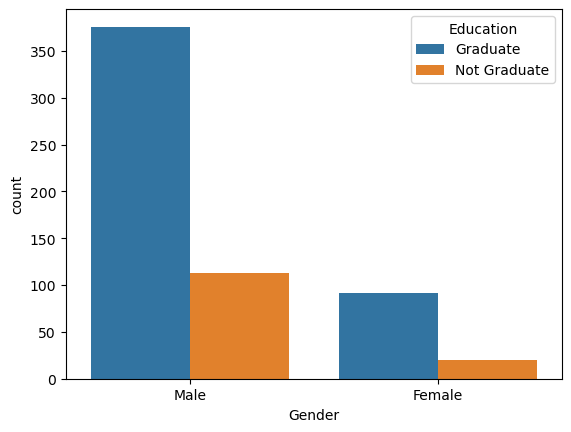

In [15]:
sns.countplot('Gender', hue = 'Education', data = train)

<AxesSubplot:>

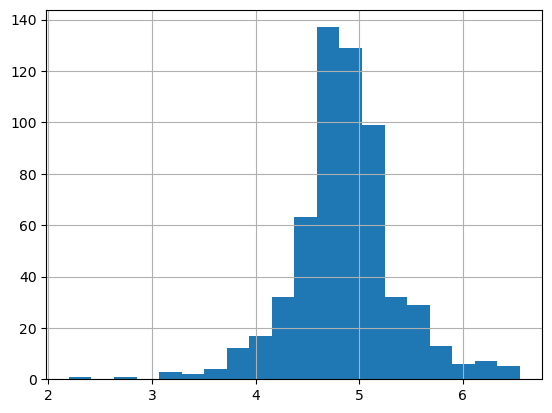

In [16]:
train['LoanAmtlog']=np.log(train['LoanAmount'])
train['LoanAmtlog'].hist(bins=20)

<AxesSubplot:>

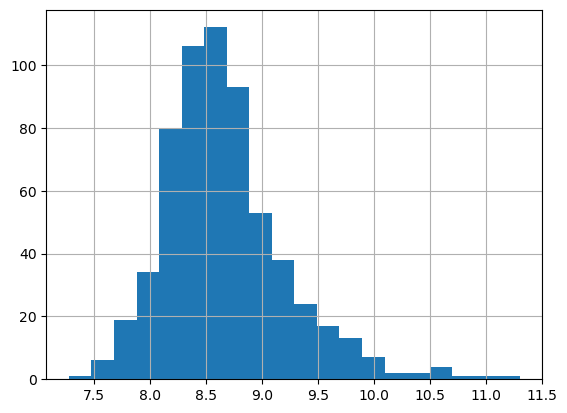

In [17]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
train['TotalIncomelog']=np.log(train['TotalIncome'])
train['TotalIncomelog'].hist(bins=20)

In [18]:
test['LoanAmtlog']=np.log(test['LoanAmount'])
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']
test['TotalIncomelog']=np.log(test['TotalIncome'])

In [19]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train.LoanAmount=train.LoanAmount.fillna(train.LoanAmount.mean())
train['LoanAmtlog']=train.LoanAmtlog.fillna(train.LoanAmtlog.mean())
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmtlog           0
TotalIncome          0
TotalIncomelog       0
dtype: int64

In [20]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmtlog           0
TotalIncome          0
TotalIncomelog       0
dtype: int64

In [21]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmtlog']=test.LoanAmtlog.fillna(test.LoanAmtlog.mean())
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [22]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmtlog           0
TotalIncome          0
TotalIncomelog       0
dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

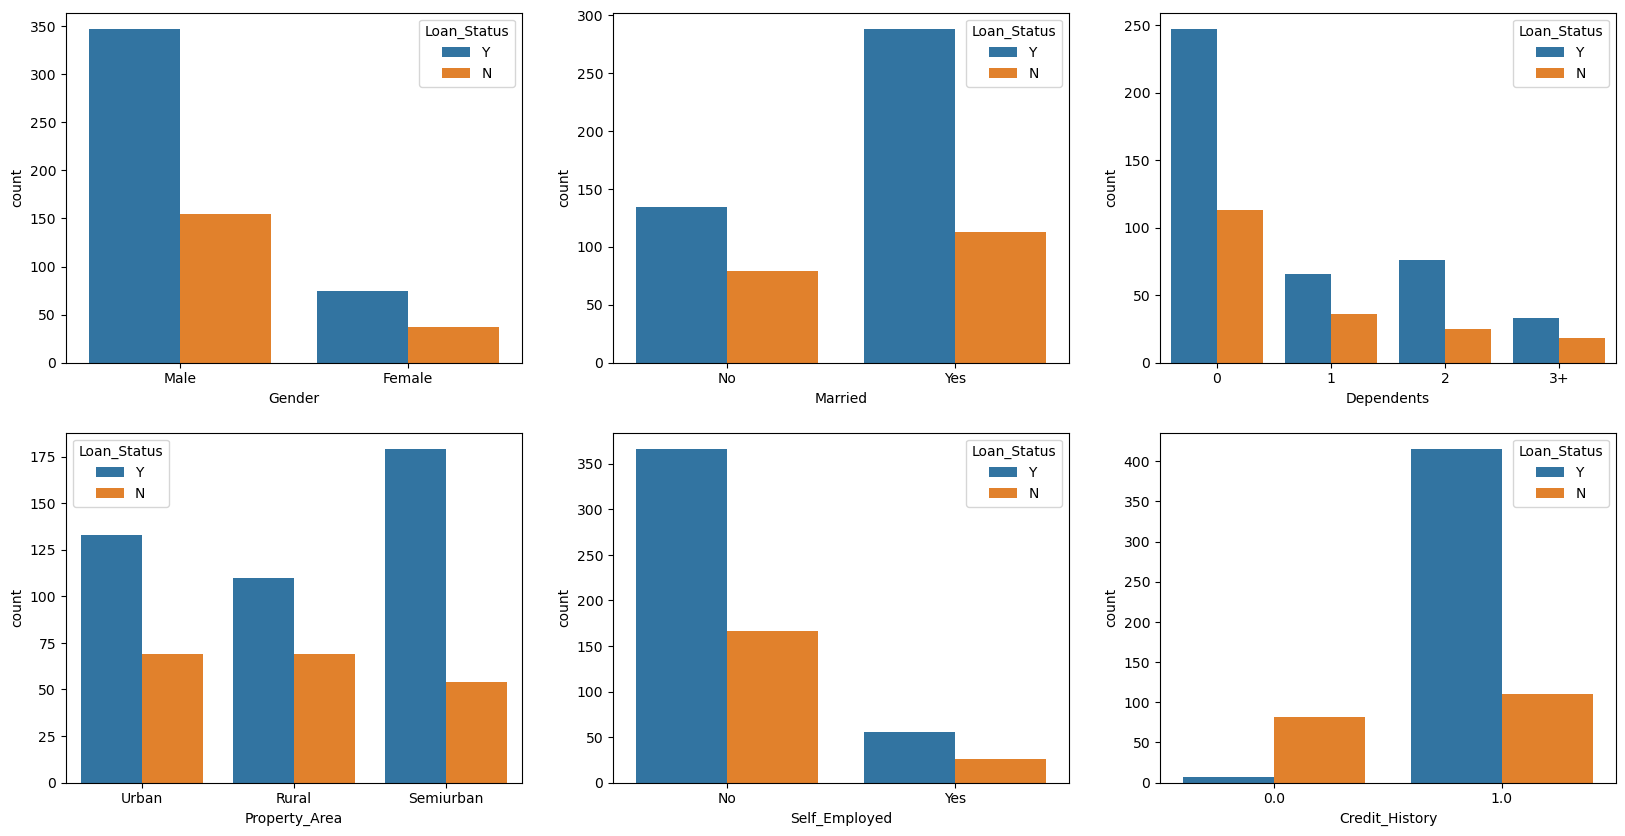

In [23]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
sns.countplot(x="Gender",hue="Loan_Status",data=train,ax=ax[0][0])
sns.countplot(x="Married",hue="Loan_Status",data=train,ax=ax[0][1])
sns.countplot(x="Dependents",hue="Loan_Status",data=train,ax=ax[0][2])
sns.countplot(x="Property_Area",hue="Loan_Status",data=train,ax=ax[1][0])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train, ax=ax[1][1])
sns.countplot(x="Credit_History",hue="Loan_Status",data=train, ax=ax[1][2])

<AxesSubplot:xlabel='LoanAmount'>

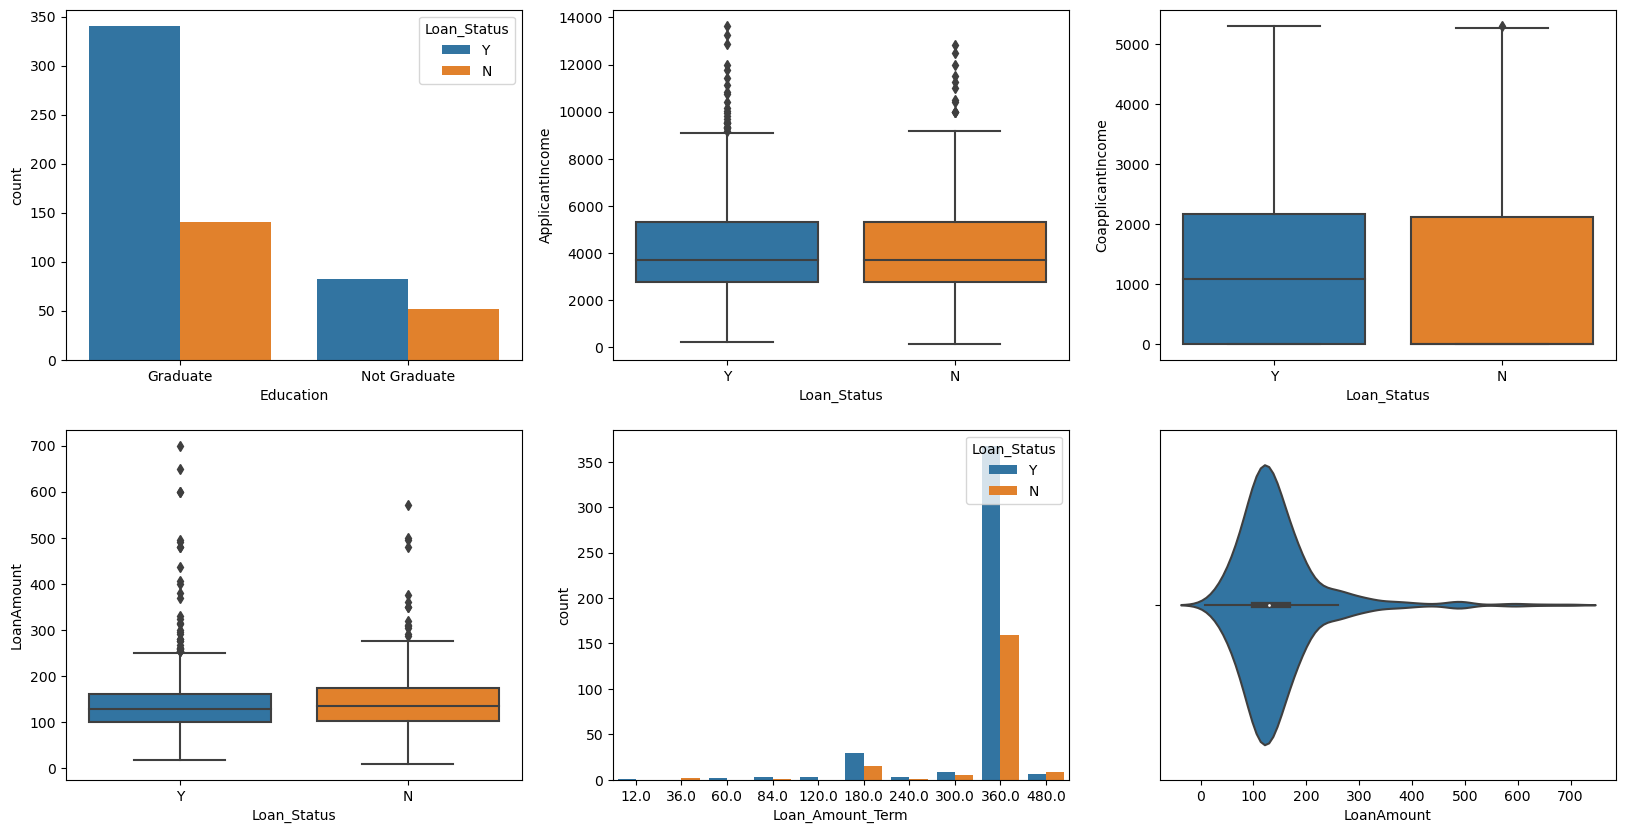

In [24]:
fig,ax = plt.subplots(figsize=(20,10),ncols=3,nrows=2)
sns.countplot(x="Education",hue="Loan_Status",data=train,ax=ax[0][0])

# Loan_Status vs ApplicantIncome
applicantIncome = train.ApplicantIncome[ train.ApplicantIncome < np.percentile(train.ApplicantIncome,95)]
loanStatus = train.Loan_Status[ train.ApplicantIncome < np.percentile(train.ApplicantIncome,95)]
sns.boxplot(x=loanStatus,y=applicantIncome,ax=ax[0][1])

# Loan_Status vs CoapplicantIncome
coapplicantIncome = train.CoapplicantIncome[ train.CoapplicantIncome < np.percentile(train.CoapplicantIncome,96)]
loanStatus = train.Loan_Status[ train.CoapplicantIncome < np.percentile(train.CoapplicantIncome,96)]
sns.boxplot(x=loanStatus,y=coapplicantIncome,ax=ax[0][2])

#Loan_Status vs LoanAmount
sns.boxplot(x="Loan_Status",y="LoanAmount",data=train,ax=ax[1][0])

sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=train,ax=ax[1][1])

sns.violinplot("LoanAmount",data=train,ax=ax[1][2])

In [25]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1) 

In [26]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [27]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [29]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
pred_lr = lr.predict(x_test)
accuracy_score(y_test,pred_lr)

0.7405405405405405

In [31]:
pred_test = lr.predict(test)

In [32]:
sub = pd.read_csv(r"C:\Users\user\Downloads\sample_submission_49d68Cx.csv")
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [33]:
sub['Loan_Status']=pred_test
sub['Loan_ID']=test_org['Loan_ID']

In [34]:
sub['Loan_Status'].replace(0, 'N', inplace=True)
sub['Loan_Status'].replace(1, 'Y', inplace=True)

In [35]:
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv(r'C:\Users\user\Downloads\log.csv')

In [36]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of {} kfold '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of 5 kfold 
accuracy_score 0.8130081300813008

2 of 5 kfold 
accuracy_score 0.7154471544715447

3 of 5 kfold 
accuracy_score 0.7967479674796748

4 of 5 kfold 
accuracy_score 0.8373983739837398

5 of 5 kfold 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.7882580301212848


In [39]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7154471544715447

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.6422764227642277

4 of kfold 5 
accuracy_score 0.6504065040650406

5 of kfold 5 
accuracy_score 0.6639344262295082

 Mean Validation Accuracy 0.6742502998800479


In [42]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of {} kfold'.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of 5 kfold
accuracy_score 0.8130081300813008

2 of 5 kfold
accuracy_score 0.8211382113821138

3 of 5 kfold
accuracy_score 0.7967479674796748

4 of 5 kfold
accuracy_score 0.7967479674796748

5 of 5 kfold
accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.8045448487271759


In [43]:
sub['Loan_Status']=pred_test
sub['Loan_ID']=test_org['Loan_ID']

In [44]:
sub['Loan_Status'].replace(0, 'N', inplace=True)
sub['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv(r'C:\Users\user\Downloads\rf.csv')

In [45]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of {} kfold'.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of 5 kfold
accuracy_score 0.6260162601626016

2 of 5 kfold
accuracy_score 0.5934959349593496

3 of 5 kfold
accuracy_score 0.6504065040650406

4 of 5 kfold
accuracy_score 0.5853658536585366

5 of 5 kfold
accuracy_score 0.6065573770491803

 Mean Validation Accuracy 0.6123683859789417
